# TODO:
- train/test for everything except the last thing
- write words
- train the models with verbose off
- standardize the model architechtures a bit more
- standardize the number of epochs a bit more

# Import data and stuff

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-04-25 19:17:12.913354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-25 19:17:12.913514: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load data and attempt simple correlation

In [4]:
data_df = pd.read_csv('./run2.csv')
data_df = data_df[data_df["speed_avg"] < 600]
data_df = data_df[["duty_cycle","speed_avg"]]
X = data_df.to_numpy()

In [5]:
data_df.corr()

,duty_cycle,speed_avg
duty_cycle,1.000000,0.869815
speed_avg,0.869815,1.000000


In [6]:
data_df

,duty_cycle,speed_avg
0,47,246.428158
1,45,259.895864
2,42,270.464729
3,42,281.724724
4,41,301.669997
...,...,...
4005,100,530.234599
4006,100,537.594669
4007,100,537.241391
4008,100,534.906953


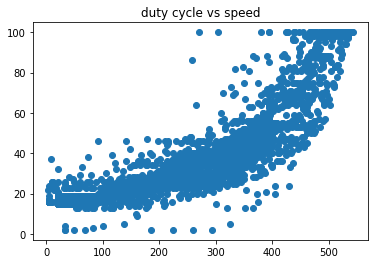

In [7]:
plt.figure()
plt.title("duty cycle vs speed")
plt.scatter(X[:,1],X[:,0]);

Given this correlation, `duty_cycle` and `speed_avg` are well correlated, but not perfectly.

# Fit linreg model

In [9]:
linreg = LinearRegression()
voltage = X[:,0].reshape(-1,1)
speed = X[:,1].reshape(-1,1)
linreg.fit(speed,voltage)
predicted_voltage = linreg.predict(speed)
linreg.score(speed,voltage)

0.7565777246563734

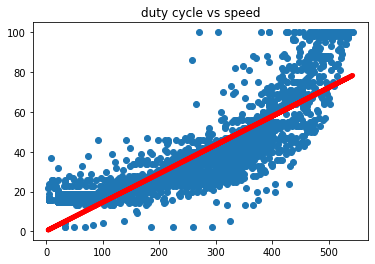

In [10]:
plt.figure()
plt.title("duty cycle vs speed")
plt.scatter(speed,voltage)
plt.plot(speed,predicted_voltage,color="red",linewidth=5.0);

Looks ok.

# Linreg rmse

In [11]:
np.sqrt(np.mean((predicted_voltage-voltage)**2))

10.790383704548834

Not a bad RMSE, but about 10% off is a lot.

# Normalize for neuralnets

In [13]:
speed_scaler = MinMaxScaler()
speed_scaler.fit(speed)
speed_scaled = speed_scaler.transform(speed)

# Define super simple model

In [14]:
model = keras.Sequential(
    [
        keras.Input(shape=(1,)),
        layers.Dense(12, activation="sigmoid", name="layer1"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 12)                24        
                                                                 
 out (Dense)                 (None, 1)                 13        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


2022-04-25 19:18:47.986455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-25 19:18:47.986569: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-25 19:18:47.986668: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (penguin): /proc/driver/nvidia/version does not exist
2022-04-25 19:18:47.987385: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.fit(speed_scaled, voltage / 100, epochs=250)

Epoch 1/250
125/125 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 2/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 3/250
125/125 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 4/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 5/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 6/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 7/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 8/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 9/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 10/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 11/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 12/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 13/250


125/125 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 100/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 101/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 102/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 103/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 104/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 105/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 106/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 107/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 108/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 109/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 110/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 

125/125 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 197/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 198/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 199/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 200/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 201/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 202/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 203/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 204/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 205/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 206/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 207/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 

### Plotting the neural net output

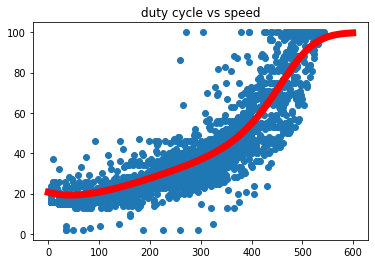

In [16]:
test_a = speed_scaler.transform(np.array(range(600)).reshape(-1,1))
predicted_voltage = model.predict(test_a) * 100
# Y = min_max_scaler_b.inverse_transform(Y_scaled)

plt.figure()
plt.title("duty cycle vs speed")
plt.scatter(speed,voltage)
plt.plot(np.array(range(600)).reshape(-1,1),predicted_voltage,color="red",linewidth=7.0);

In [17]:
predicted_voltage = model.predict(speed_scaler.transform(speed)) * 100
np.sqrt(np.mean((predicted_voltage-voltage)**2))

7.3629117429131234

Slightly better. 7.5% off though. Let's try to improve.

# With acceleration

Maybe acceleration gives us more context?

In [18]:
data_df = pd.read_csv('./run2.csv')
data_df = data_df[data_df["speed_avg"] < 600]
data_df = data_df[["duty_cycle","acc","speed_avg"]]
X = data_df.to_numpy()

### Linreg again

In [19]:
linreg = LinearRegression()
voltage = X[:,0].reshape(-1,1)
X_actual = X[:,1:]
linreg.fit(X_actual,voltage)
predicted_voltage = linreg.predict(X_actual)
linreg.score(X_actual,voltage)

0.7583845405246178

### Linreg rmse

In [20]:
np.sqrt(np.mean((predicted_voltage-voltage)**2))

10.750262993837906

So linear regression doesn't really do any better. Maybe a nonlinear relationship exists?

### Neural net again

In [21]:
model = keras.Sequential(
    [
        keras.Input(shape=(2,)),
        layers.Dense(12, activation="sigmoid", name="layer1"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 12)                36        
                                                                 
 out (Dense)                 (None, 1)                 13        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


# Scale the data

In [23]:
X_scaler = MinMaxScaler()
X_scaler.fit(X_actual)
X_scaled = X_scaler.transform(X_actual)

In [24]:
model.fit(X_scaled, voltage / 100, epochs=250)

Epoch 1/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0379
Epoch 2/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 3/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 4/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 5/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 6/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 7/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 8/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 9/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 10/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 11/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 12/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 13/250


125/125 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 100/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 101/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 102/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 103/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 104/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 105/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 106/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 107/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 108/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 109/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 110/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 

125/125 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 197/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 198/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 199/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 200/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 201/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 202/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 203/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 204/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 205/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 206/250
125/125 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 207/250
125/125 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 

In [25]:
predicted_voltage = model.predict(X_scaled) * 100
np.sqrt(np.mean((predicted_voltage-voltage)**2))

7.293978256687743

Rmse is a bit better. Still not amazing.

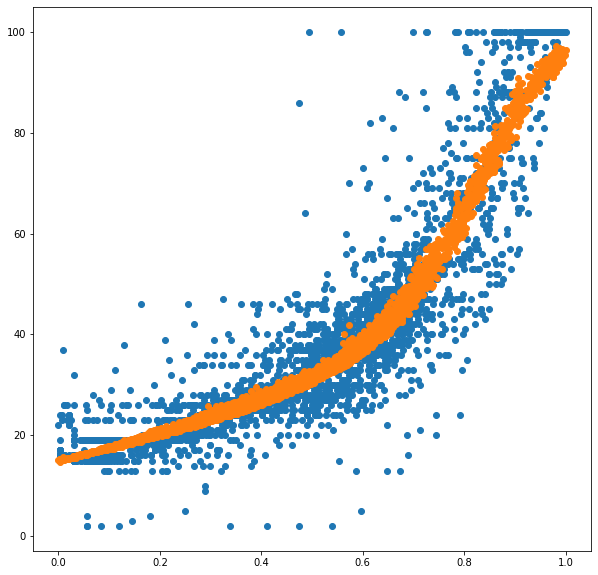

In [26]:
speed = X_scaled[:,1]
plt.figure(figsize=(10,10))
plt.scatter(speed, voltage)
plt.scatter(speed, predicted_voltage)

A tiny bit better now. The graph has a nicer spread.

# Basic RNN

Our data has a temporal aspect. An RNN would probably be great here. Let's try.

### Define lookback as `N` (This is how much context we give to our decision)

In [27]:
N = 10

### Let's try a simple RNN first.

In [28]:
model = keras.Sequential(
    [
        keras.Input(shape=(N,2)),
        layers.SimpleRNN(12, name="rnnlayer"),
        layers.Dense(12, activation="sigmoid", name="layer2"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnnlayer (SimpleRNN)        (None, 12)                180       
                                                                 
 layer2 (Dense)              (None, 12)                156       
                                                                 
 out (Dense)                 (None, 1)                 13        
                                                                 
Total params: 349
Trainable params: 349
Non-trainable params: 0
_________________________________________________________________


### Get continuous sequences from the data

The data has splits in it whenver a turn was made, so we need to find the parts that are continuous to train on.

### Build training data from the continuous sequences

In [29]:
data_df = pd.read_csv('./run2.csv')
data_df = data_df[data_df["speed_avg"] < 600]
data_df = data_df[["ts","duty_cycle","acc","speed_avg"]]
X = data_df.to_numpy()

timestamps = X[:,0] 
ts_diffs = timestamps[1:] - timestamps[:-1]

sequences = []
current_sequence = []

for i, diff in enumerate(ts_diffs):
    if diff < 101:
        current_sequence.append(i)
    else:
        if len(current_sequence) > N * 2:
            sequences.append(current_sequence)
        current_sequence = [i]
        
print(len(sequences))

X_relevant = X[:,2:]
Xs_scaler = MinMaxScaler()
Xs_scaler.fit(X_relevant)
X_relevant = Xs_scaler.transform(X_relevant)

# for sequence in sequences:
from sklearn.utils import shuffle

all_Xs = []
all_Ys = []
for sequence in sequences[:]:
    Xs = []
    Ys = []
    for n in sequence[N:]:
        indexes_x = np.arange(n-N,n)
        index_y = n
        Ys.append(X[index_y,1])
        Xs.append(X_relevant[indexes_x])
    all_Xs += Xs
    all_Ys += Ys

all_Xs = np.array(all_Xs)
all_Ys = np.array(all_Ys).reshape(-1,1)

all_Xs, all_Ys = shuffle(all_Xs,all_Ys)

print(all_Xs.shape, all_Ys.shape)

32
(3509, 10, 2) (3509, 1)


In [30]:
model.fit(all_Xs, all_Ys/100, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
110/110 [==============================] - 1s 4ms/step - loss: 0.0177
Epoch 2/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 3/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 7/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 8/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 9/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 10/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 11/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 12/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 13/100


110/110 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 100/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0027


In [31]:
predicted_voltage = model.predict(all_Xs) * 100
np.sqrt(np.mean((predicted_voltage-all_Ys)**2))

4.906289175963283

Rmse of 4.9 is much better!

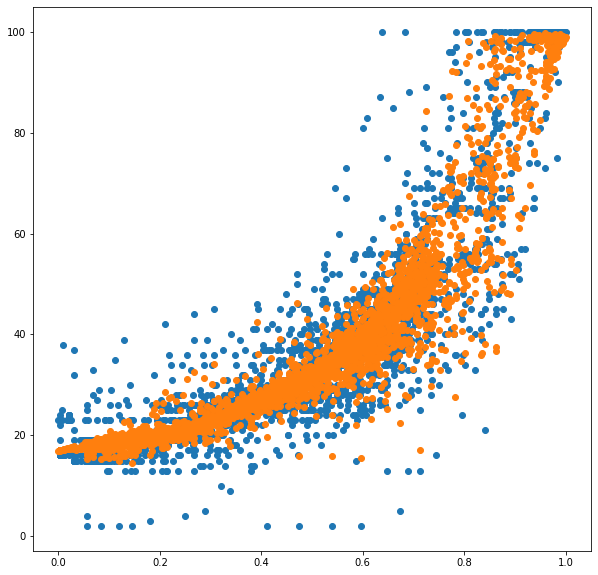

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(all_Xs[:,N-1,1], all_Ys)
plt.scatter(all_Xs[:,N-1,1], predicted_voltage)

Much better spread

In [43]:
from keras.models import save_model

save_model(model, "best_model_ever.h5")

### Lets try lstm

In [52]:
model = keras.Sequential(
    [
        keras.Input(shape=(N,2)),
        layers.LSTM(12, name="lstmlayer"),
        layers.Dense(12, activation="sigmoid", name="layer2"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstmlayer (LSTM)            (None, 12)                720       
                                                                 
 layer2 (Dense)              (None, 12)                156       
                                                                 
 out (Dense)                 (None, 1)                 13        
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(all_Xs, all_Ys/100, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
110/110 [==============================] - 3s 6ms/step - loss: 0.0186
Epoch 2/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0095
Epoch 3/100
110/110 [==============================] - 1s 5ms/step - loss: 0.0064
Epoch 4/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0050
Epoch 5/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0040
Epoch 6/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0039
Epoch 7/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0035
Epoch 8/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0036
Epoch 9/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0033
Epoch 10/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0030
Epoch 11/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0032
Epoch 12/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 13/100


KeyboardInterrupt: 

In [56]:
predicted_voltage = model.predict(all_Xs) * 100
np.sqrt(np.mean((predicted_voltage-all_Ys)**2))

4.8487315790797485

Even better!

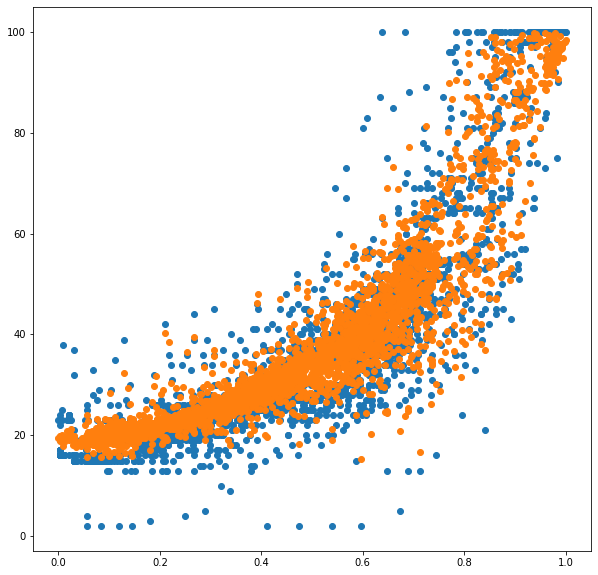

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(all_Xs[:,N-1,1], all_Ys)
plt.scatter(all_Xs[:,N-1,1], predicted_voltage)

### Overkill LSTM

Our RNN clearly fits our data pretty well. Let's make it much bigger and see how it does.

In [58]:
model = keras.Sequential(
    [
        keras.Input(shape=(N,2)),
        layers.LSTM(64, name="rnnlayer"),
        layers.Dense(64, activation="relu", name="layer1"),
        layers.Dense(128, activation="relu", name="layer2"),
        layers.Dense(64, activation="relu", name="layer3"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnnlayer (LSTM)             (None, 64)                17152     
                                                                 
 layer1 (Dense)              (None, 64)                4160      
                                                                 
 layer2 (Dense)              (None, 128)               8320      
                                                                 
 layer3 (Dense)              (None, 64)                8256      
                                                                 
 out (Dense)                 (None, 1)                 65        
                                                                 
Total params: 37,953
Trainable params: 37,953
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(all_Xs, all_Ys/100, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
110/110 [==============================] - 3s 7ms/step - loss: 0.0137
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0052
Epoch 3/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0039
Epoch 4/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0046
Epoch 5/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0042
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0031
Epoch 7/100
110/110 [==============================] - 1s 8ms/step - loss: 0.0030
Epoch 8/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0032
Epoch 9/100
110/110 [==============================] - 1s 8ms/step - loss: 0.0031
Epoch 10/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0031
Epoch 11/100
110/110 [==============================] - 1s 8ms/step - loss: 0.0030
Epoch 12/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0032
Epoch 13/100


110/110 [==============================] - 1s 8ms/step - loss: 0.0022
Epoch 100/100
110/110 [==============================] - 1s 8ms/step - loss: 0.0021


In [60]:
predicted_voltage = model.predict(all_Xs) * 100
np.sqrt(np.mean((predicted_voltage-all_Ys)**2))

4.725197230884337

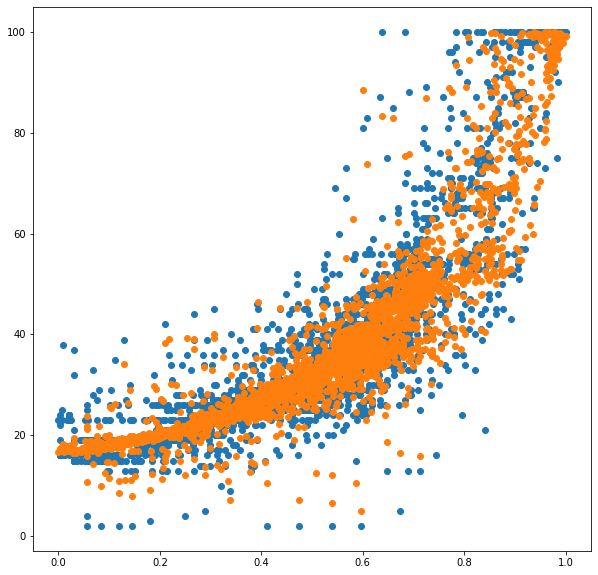

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(all_Xs[:,N-1,1], all_Ys)
plt.scatter(all_Xs[:,N-1,1], predicted_voltage)

Really not any better. Not worth the extra computation. Especially since we are doing the computation on the fly.

# A different approach

These approaches have a fatal flaw in the real world. What is the input for `speed` during inference?

In the real world, we have an "actual speed" and a "desired speed"

- actual speed = speed measured by the speed sensor on the vehicle
- desired speed = speed that is being asked for

For our supervised approach, we can assume that the "desired speed" for timestep $X$ is the "actual speed" at timestep $X + N$ where $N$ is how long it takes for a desire to become a reality for a human. 

Let's search for the best $N$ (how long for a desire to become actual).

To do this, we will use the same methods as the previous RNN examples, but instead of creating data with "look back" we instead will have single points with actual/desired based on the defined $N$.

In [64]:
from sklearn.model_selection import train_test_split

In [67]:
data_df = pd.read_csv('./run2.csv')

data_df = data_df[data_df["speed_avg"] < 600]
data_df = data_df[["ts","duty_cycle","acc","speed_avg"]]
X = data_df.to_numpy()

results = []

def get_data_n(N):
    timestamps = X[:,0] 
    ts_diffs = timestamps[1:] - timestamps[:-1]

    X_relevant = X[:,2:]
    Xs_scaler = MinMaxScaler()
    Xs_scaler.fit(X_relevant)
    X_relevant = Xs_scaler.transform(X_relevant)

    sequences = []
    current_sequence = []

    for i, diff in enumerate(ts_diffs):
        if diff < 101:
            current_sequence.append(i)
        else:
            if len(current_sequence) > N * 2:
                sequences.append(current_sequence)
            current_sequence = [i]

    print(f'num cont sequences is {len(sequences)}')

    all_Xs = []
    all_Ys = []
    for sequence in sequences[:]:
        Xs = []
        Ys = []
        for n in sequence[:-N]:
            index_actual = n
            index_desired = n + N
            Ys.append(X[index_actual,1])
            x_val = np.hstack((X_relevant[index_actual],X_relevant[index_desired, 1]))
    #         print(x_val)
            Xs.append(x_val)
        all_Xs += Xs
        all_Ys += Ys

    all_Xs = np.array(all_Xs)
    all_Ys = np.array(all_Ys).reshape(-1,1)
    return all_Xs, all_Ys

def test_n(N, verbose=0):
    all_Xs,all_Ys = get_data_n(N)

    train_Xs, test_Xs, train_Ys, test_Ys  = train_test_split(all_Xs, all_Ys, test_size=0.25, random_state=42)
        
    model = keras.Sequential(
        [
            keras.Input(shape=(3,)),
            layers.Dense(6, activation="sigmoid", name="layer1"),
            layers.Dense(6, activation="sigmoid", name="layer2"),
            layers.Dense(6, activation="sigmoid", name="layer3"),
            layers.Dense(1, name='out', activation='sigmoid')
        ]
    )
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=opt)
    
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
    mc = tf.keras.callbacks.ModelCheckpoint(f'best_contextual_model_n_equals_{N}.h5', monitor='val_loss', mode='min')
    model.fit(train_Xs, train_Ys/100, validation_data=(test_Xs,test_Ys/100), epochs=5000, batch_size=32, verbose=verbose, callbacks=[es,mc])
    
    train_predicted_voltage = model.predict(train_Xs) * 100
    train_rmse = np.sqrt(np.mean((train_predicted_voltage-train_Ys)**2))
    
    test_predicted_voltage = model.predict(test_Xs) * 100
    test_rmse = np.sqrt(np.mean((test_predicted_voltage-test_Ys)**2))
    
    results.append([N,train_rmse,test_rmse])
    print(f"{N} got {train_rmse} - {test_rmse}")
    model = keras.models.load_model(f'best_contextual_model_n_equals_{N}.h5')
    return model


In [68]:
models = [test_n(n) for n in range(1,11)]

num cont sequences is 44
1 got 4.90950489191428 - 5.473371420801499
num cont sequences is 42
2 got 4.700238446892648 - 4.206904297284069
num cont sequences is 38
3 got 4.055153805872403 - 4.152878376504419
num cont sequences is 37
4 got 3.7155401671962687 - 3.766490485917722
num cont sequences is 37
5 got 3.780767031352639 - 4.227853595089996
num cont sequences is 35
6 got 4.133255803061706 - 4.0446456256878305
num cont sequences is 34
7 got 4.4409153690522825 - 4.3048284455599015
num cont sequences is 33
8 got 4.502731863880897 - 4.5717086729564445
num cont sequences is 33
9 got 4.884604775698027 - 4.332990057105832
num cont sequences is 32
10 got 5.062423546070976 - 4.808931217845363


In [69]:
results = np.array(results)
pd.DataFrame(results, columns=['N', 'train rmse', 'test rmse'])

,N,train rmse,test rmse
0,1.0,4.909505,5.473371
1,2.0,4.700238,4.206904
2,3.0,4.055154,4.152878
3,4.0,3.715540,3.766490
4,5.0,3.780767,4.227854
5,6.0,4.133256,4.044646
6,7.0,4.440915,4.304828
7,8.0,4.502732,4.571709
8,9.0,4.884605,4.332990
9,10.0,5.062424,4.808931


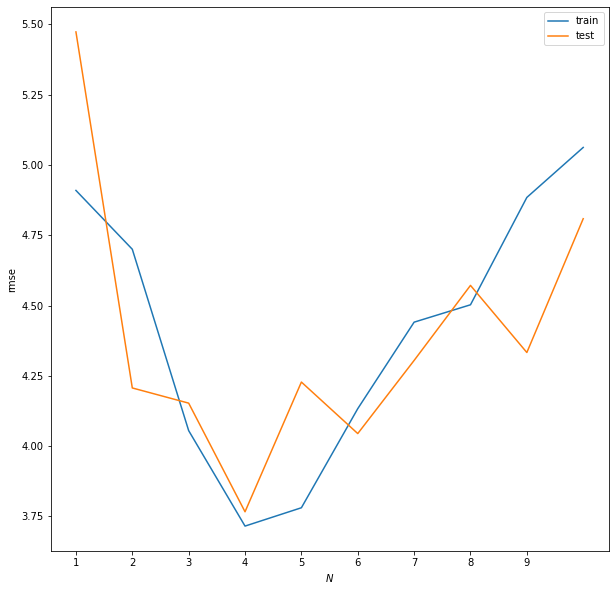

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(results[:,0],results[:,1], label="train")
plt.plot(results[:,0],results[:,2], label="test")
ax.set_xticks(np.arange(1,10))
plt.legend(loc="upper right")
plt.xlabel('$N$')
plt.ylabel("rmse")
plt.show()

It looks like 3 or 4 are great options.

### Simple Neural Net

In [72]:
model = models[3]

In [73]:
all_Xs,all_Ys = get_data_n(4)
predicted_voltage = model.predict(all_Xs) * 100
np.sqrt(np.mean((predicted_voltage-all_Ys)**2))

num cont sequences is 37


3.728346365942846

In [81]:
model.predict([[0.5,0.3,0.5]])

array([[0.36455262]], dtype=float32)

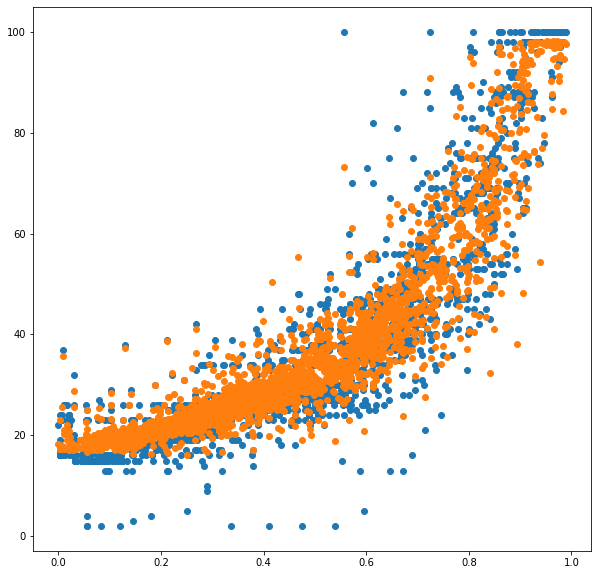

In [82]:
# %matplotlib notebook


speed = all_Xs[:,1]
speed2 = all_Xs[:,2]
num_to_plot = 3000
samples_to_plot = np.random.randint(0,len(speed) - num_to_plot)
plt.figure(figsize=(10,10))
# ax = plt.axes(projection='3d')
# print(len(speed))
plt.scatter(speed[samples_to_plot:samples_to_plot+num_to_plot], all_Ys[samples_to_plot:samples_to_plot+num_to_plot])
plt.scatter(speed[samples_to_plot:samples_to_plot+num_to_plot], predicted_voltage[samples_to_plot:samples_to_plot+num_to_plot])

# ax.scatter3D(speed[samples_to_plot:samples_to_plot+num_to_plot], speed2[samples_to_plot:samples_to_plot+num_to_plot], all_Ys[samples_to_plot:samples_to_plot+num_to_plot], cmap='Greens')
# ax.scatter3D(speed[samples_to_plot:samples_to_plot+num_to_plot], speed2[samples_to_plot:samples_to_plot+num_to_plot], predicted_voltage[samples_to_plot:samples_to_plot+num_to_plot], cmap='Red')
# ax.set_xlabel('actual speed', fontsize=20)
# ax.set_ylabel('desired speed', fontsize=20)
# ax.set_zlabel('voltage', fontsize=20);

Weird. But better.

In [80]:
from keras.models import save_model

#save_model(model, "contextual_model.h5")